In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from datasets import GrayscaleImageFolder
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor
from torchvision.utils import make_grid

experiment_name = '128_all_run2'
test_generator_path = f'D:/GitRepos/DL8TQ2_KepalkotoDiagnosztikaBeadando/runs/{experiment_name}/generator_last.pt'
noise_vector_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = torch.jit.load(test_generator_path)

In [4]:
sample_size = 10000
image_size = 128

transforms = Compose([
    Resize(image_size),
    CenterCrop(image_size),
    ToTensor()
])

dataset = GrayscaleImageFolder(root="D:/Data/Lung/images/RawExports/",
                               transform=transforms)

dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=sample_size,
                                         shuffle=True)

real_batch = next(iter(dataloader))


fake_batch = []

with torch.inference_mode():
    for i in range(10):
        fixed_noise = torch.randn(1000, noise_vector_size, 1, 1, device=device)
        fake_batch.append(generator(fixed_noise).detach().to(torch.device('cpu')))

RuntimeError: CUDA error: the launch timed out and was terminated
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [3]:
fake_batch = torch.empty((1,3,128,128))
fake_batch.shape

torch.Size([1, 3, 128, 128])

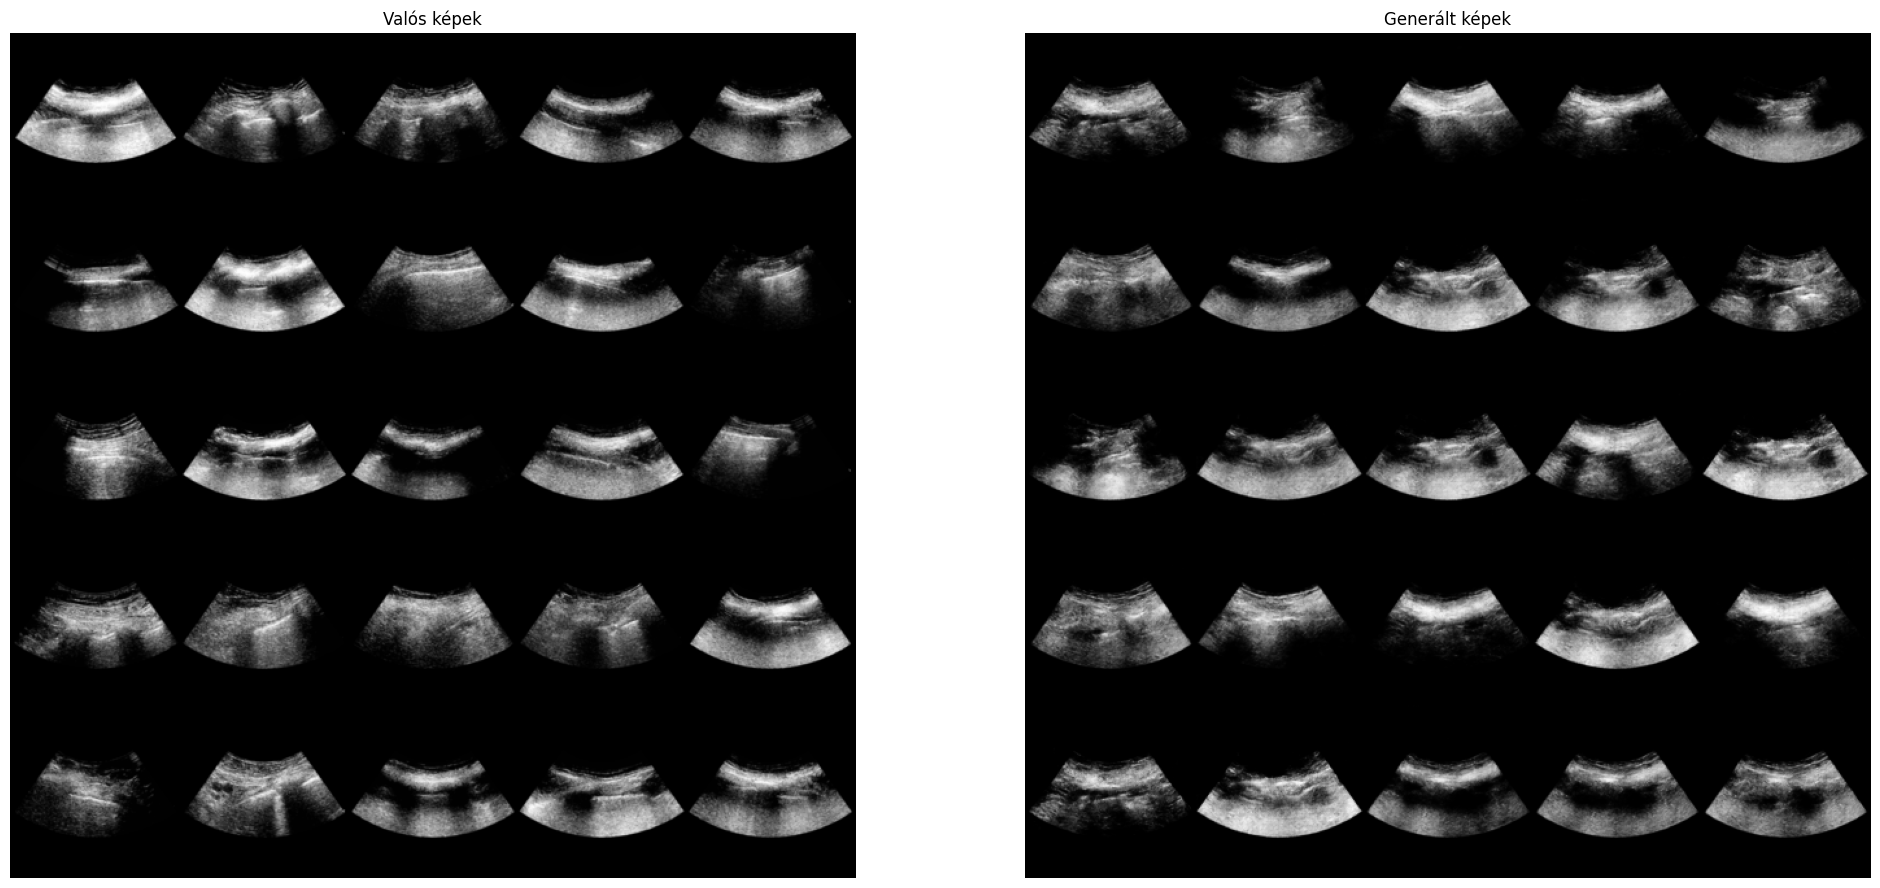

In [37]:
plt.figure(figsize=(24,24))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Valós képek")
plt.imshow(np.transpose(make_grid(real_batch.to(device)[1:26], padding=2, normalize=True, nrow=5).cpu(),(1,2,0)), cmap='gray')

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Generált képek")
plt.imshow(np.transpose(make_grid(test_batch.to(device)[1:26], padding=2, normalize=True, nrow=5).cpu(),(1,2,0)), cmap='gray')
plt.show()

In [3]:
def TransformTo3Channels(img_batch):
    img_batch = img_batch.permute(1,0,2,3)
    img_batch = img_batch.expand(3, *img_batch.shape[1:]).permute(1,0,2,3).type(torch.uint8)
    return img_batch

In [4]:
from torchmetrics.image.fid import FrechetInceptionDistance
fid = FrechetInceptionDistance(feature=64)
fid.update(TransformTo3Channels(real_batch).type(torch.uint8), real=True)
fid.update(TransformTo3Channels(test_batch), real=False)
fid.compute()

tensor(0.1143)

tensor(0.8039)